In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sonar.all-data.csv')

In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df['Label']=pd.get_dummies(df['Label'])

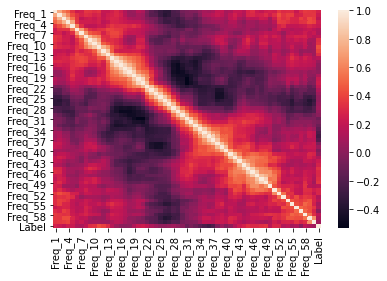

In [12]:
# Correlation heatmap
sns.heatmap(df.corr())

In [23]:
#Top 5 correlation columns
df.corr()['Label'].sort_values(ascending=False).head(6)

Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64

In [24]:
# Data Preprocessing
from sklearn.model_selection import train_test_split

In [27]:
X=df.drop('Label',axis=1)
y=df['Label']

In [29]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_test, X_final, y_test, y_final = train_test_split(X_eval, y_eval, test_size=0.1, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [37]:
scaler=StandardScaler()
knn=KNeighborsClassifier()

In [39]:
# Pipeline Creation
from sklearn.pipeline import Pipeline
pipe=Pipeline([('scaler',scaler),('knn',knn)])

In [47]:
# GridSearch to choose best hyperparameters
from sklearn.model_selection import GridSearchCV
k_values=list(range(1,10))
param_grid={'knn__n_neighbors':k_values}

In [48]:
grid_model=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy',verbose=2)

In [49]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] knn__n_neighbors=1 ..............................................
[CV] ............................... knn__n_neighbors=1, total=   0.1s
[CV] knn__n_neighbors=1 ..............................................
[CV] ............................... knn__n_neighbors=1, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] ............................... knn__n_neighbors=1, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] ............................... knn__n_neighbors=1, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] ............................... knn__n_neighbors=1, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] ............................... knn__n_neighbors=2, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... knn__n_neighbors=2, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] ............................... knn__n_neighbors=2, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] ............................... knn__n_neighbors=2, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] ............................... knn__n_neighbors=2, total=   0.0s
[CV] knn__n_neighbors=3 ..............................................
[CV] ............................... knn__n_neighbors=3, total=   0.0s
[CV] knn__n_neighbors=3 ..............................................
[CV] ............................... knn__n_neighbors=3, total=   0.0s
[CV] knn__n_neighbors=3 ..............................................
[CV] ............................... knn__n_neighbors=3, total=   0.0s
[CV] knn__n_neighbors=3 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [50]:
grid_model.best_params_

{'knn__n_neighbors': 1}

In [63]:
#Final model evaluation
preds=grid_model.predict(X_eval)

In [64]:
preds

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
      dtype=uint8)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
confusion_matrix(y_eval,preds)

array([[14,  2],
       [ 2, 24]], dtype=int64)

In [68]:
print(classification_report(y_eval,preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.92      0.92      0.92        26

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42

